In [3]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

from PIL import Image

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-09-16 14:56:13,849: Credentials are already in use. The existing account in the session will be replaced.


In [4]:
test_image = Image.open('clock_test_image.tiff')
#test_image.show()

np_test_image = np.array(test_image)

test_image_final = []
for row in np_test_image:
    for pixel in row:
        test_image_final.append( pixel[0] / 256)

np_test_image_final = np.array(test_image_final)

    #rms = np.sqrt(np.sum(np.sum(array**2)))
    #ret_array = []
    #for i in array:
     #   ret_array.append( (i * (1/rms)) )
    
    #npret_array = np.array(ret_array)
    #return npret_array

#print(np_test_image_final)

np_test_image_final_reshaped = np_test_image_final.reshape((64,64))
print(np_test_image_final_reshaped)



[[0.70703125 0.60546875 0.7265625  ... 0.75390625 0.75390625 0.66015625]
 [0.75390625 0.62890625 0.7265625  ... 0.76171875 0.78515625 0.640625  ]
 [0.7421875  0.64453125 0.74609375 ... 0.78515625 0.796875   0.6796875 ]
 ...
 [0.74609375 0.58984375 0.76953125 ... 0.625      0.61328125 0.6328125 ]
 [0.734375   0.5703125  0.75       ... 0.625      0.65625    0.64453125]
 [0.7421875  0.6015625  0.71875    ... 0.69921875 0.70703125 0.70703125]]


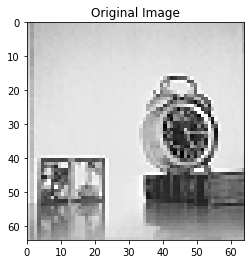

In [5]:
def plot_image64(img, title: str):
    plt.title(title)
    #plt.xticks(range(img.shape[0]))
    #plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, 64, 64, 0], vmin=0, vmax=1, cmap='gray')
    plt.show()

def plot_image64_001(img, title: str):
    plt.title(title)
    #plt.xticks(range(img.shape[0]))
    #plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, 64, 64, 0], vmin=0, vmax=0.05, cmap='gray')
    plt.show()
    
plot_image64(np_test_image_final_reshaped, "Original Image")    

[[0.01453049 0.01244324 0.01493189 ... 0.01549384 0.01549384 0.01356715]
 [0.01549384 0.01292492 0.01493189 ... 0.0156544  0.01613607 0.01316575]
 [0.01525301 0.01324603 0.01533328 ... 0.01613607 0.01637691 0.01396854]
 ...
 [0.01533328 0.01212213 0.01581496 ... 0.01284464 0.0126038  0.01300519]
 [0.01509245 0.01172073 0.01541356 ... 0.01284464 0.01348687 0.01324603]
 [0.01525301 0.01236296 0.01477133 ... 0.01436994 0.01453049 0.01453049]]


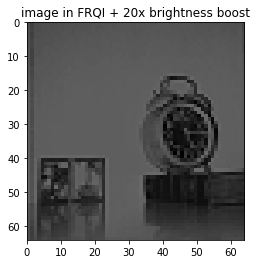

In [6]:
def normalize(array):
    rms = np.sqrt(np.sum(np.sum(array**2)))
    ret_array = []
    for i in array:
        ret_array.append( (i * (1/rms)) )
    
    npret_array = np.array(ret_array)
    return npret_array

np_test_image_final_reshaped_normalized = normalize(np_test_image_final_reshaped)
print(np_test_image_final_reshaped_normalized)

plot_image64_001(np_test_image_final_reshaped_normalized, 'image in FRQI + 20x brightness boost')

In [ ]:
plot_image64()

In [7]:
decUnitary = np.roll(np.identity(2**13), 1, axis=1)
print(decUnitary)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]


In [8]:
# Convert the raw pixel values to probability amplitudes
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)


image_state = amplitude_encode(np_test_image_final_reshaped)

print(image_state)

[0.01453049 0.01244324 0.01493189 ... 0.01436994 0.01453049 0.01453049]


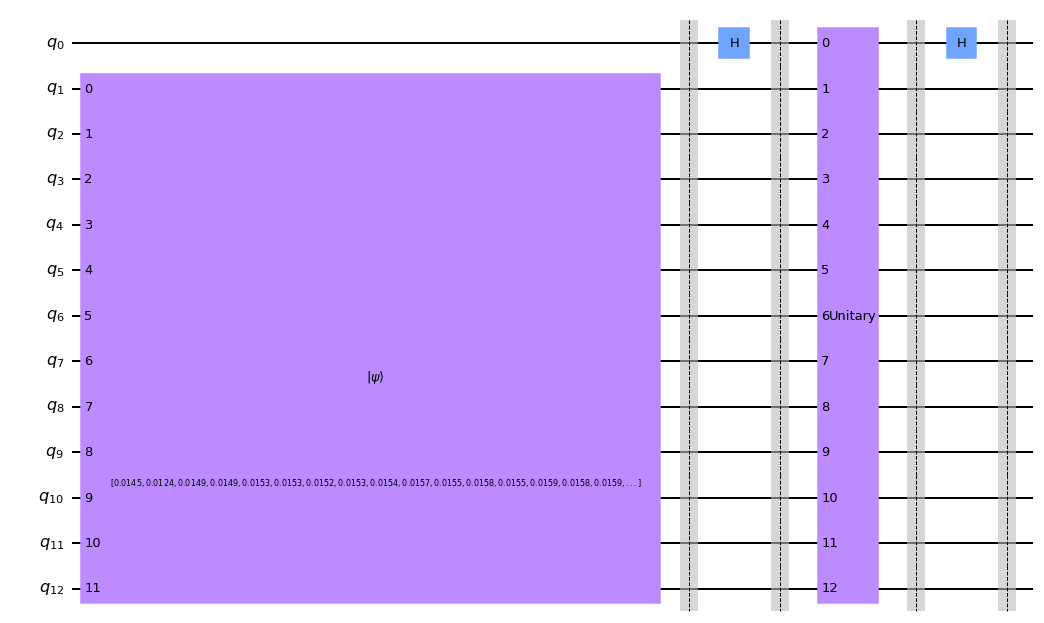

In [9]:
#First Iteration!
qc = QuantumCircuit(13)

qc.initialize(image_state, [1,2,3,4,5,6,7,8,9,10,11,12])
qc.barrier()

qc.h(0)
qc.barrier()

qc.unitary(decUnitary, [0,1,2,3,4,5,6,7,8,9,10,11,12])
qc.barrier()

qc.h(0)

qc.save_statevector()



qc.draw()

In [24]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
cdec = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)
print(statevector)

Statevector([ 1.34868682e-02-7.61928792e-19j,
              1.04362670e-03+7.61928792e-19j,
              1.36875656e-02-9.14314551e-19j, ...,
             -2.35595489e-18+8.89736203e-19j,
              1.45304949e-02-8.89736203e-19j,
             -2.35595489e-18+8.89736203e-19j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


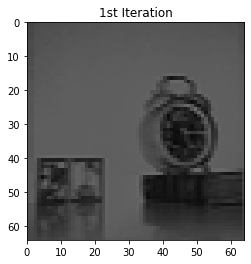

In [30]:
iteration1 = []
for i in range(2**13):
    if(i % 2 == 0):
        iteration1.append(np.real(statevector[i]))
        
#print(iteration1)

npiteration1 = np.array(iteration1)
npiteration1 = normalize(npiteration1)
npiteration1 = npiteration1.reshape((64,64))

plot_image64_001(npiteration1, "1st Iteration")

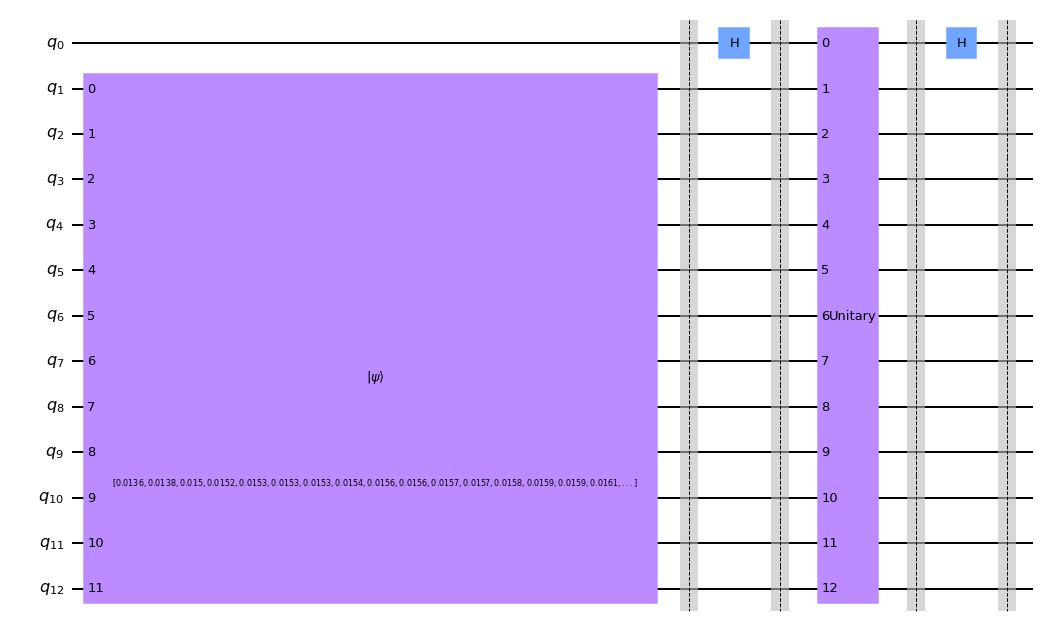

In [32]:
#Second Iteration:
iteration1_state = amplitude_encode(npiteration1)

qc = QuantumCircuit(13)

qc.initialize(iteration1_state, [1,2,3,4,5,6,7,8,9,10,11,12])
qc.barrier()

qc.h(0)
qc.barrier()

qc.unitary(decUnitary, [0,1,2,3,4,5,6,7,8,9,10,11,12])
qc.barrier()

qc.h(0)

qc.save_statevector()

qc.draw()

In [33]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector2 = result.get_statevector(qc)

print(statevector2)

Statevector([ 1.36515147e-02-8.42087851e-19j,
             -1.00823594e-04+8.42087851e-19j,
              1.43774445e-02-9.18641292e-19j, ...,
             -2.41818806e-18+8.93946634e-19j,
              1.40749738e-02-8.29740522e-19j,
              5.24282690e-04+8.29740522e-19j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


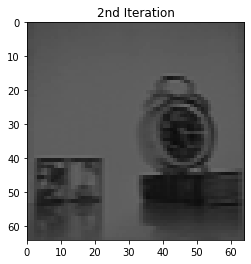

In [34]:
iteration2 = []
for i in range(2**13):
    if(i % 2 == 0):
        iteration2.append(np.real(statevector2[i]))
        
#print(iteration1)

npiteration2 = np.array(iteration2)
npiteration2 = normalize(npiteration2)
npiteration2 = npiteration2.reshape((64,64))

plot_image64_001(npiteration2, "2nd Iteration")

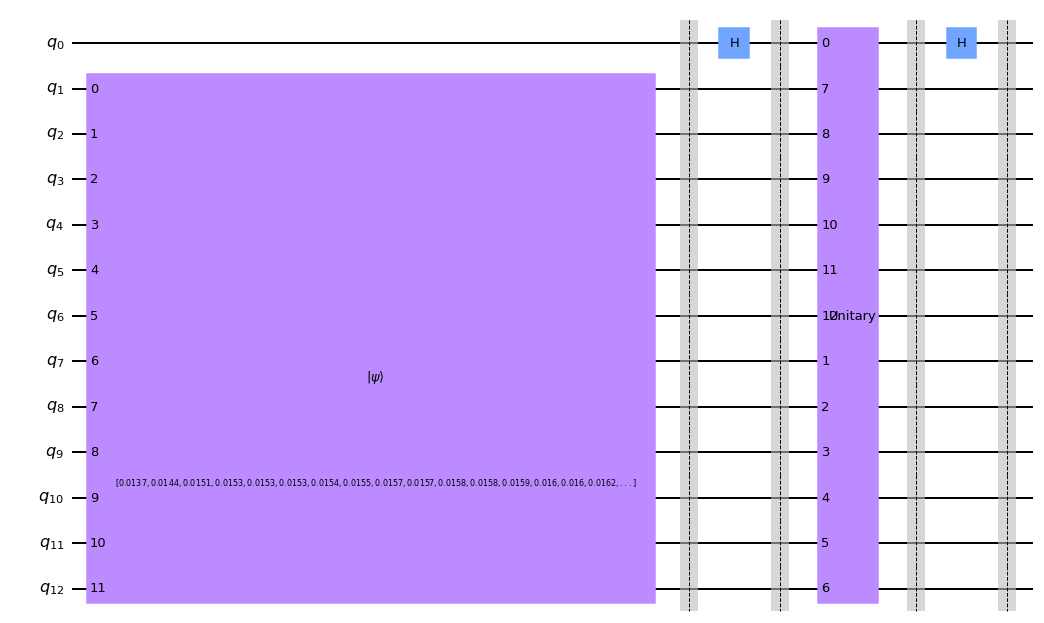

In [35]:
#Second Iteration:
iteration2_state = amplitude_encode(npiteration2)

qc = QuantumCircuit(13)

qc.initialize(iteration2_state, [1,2,3,4,5,6,7,8,9,10,11,12])
qc.barrier()

qc.h(0)
qc.barrier()

qc.unitary(decUnitary, [0,7,8,9,10,11,12,1,2,3,4,5,6])
qc.barrier()

qc.h(0)

qc.save_statevector()

qc.draw()

In [36]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector3 = result.get_statevector(qc)

print(statevector3)

Statevector([ 1.39176940e-02-8.67055578e-19j,
             -2.42398154e-04+8.67055578e-19j,
              1.44529900e-02-8.88082604e-19j, ...,
              8.07993848e-05+8.85608836e-19j,
              1.38873943e-02-8.37370366e-19j,
              2.12098385e-04+8.37370366e-19j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


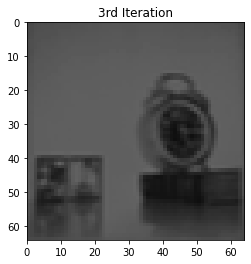

In [37]:
iteration3 = []
for i in range(2**13):
    if(i % 2 == 0):
        iteration3.append(np.real(statevector3[i]))
        
#print(iteration1)

npiteration3 = np.array(iteration3)
npiteration3 = normalize(npiteration3)
npiteration3 = npiteration3.reshape((64,64))

plot_image64_001(npiteration3, "3rd Iteration")

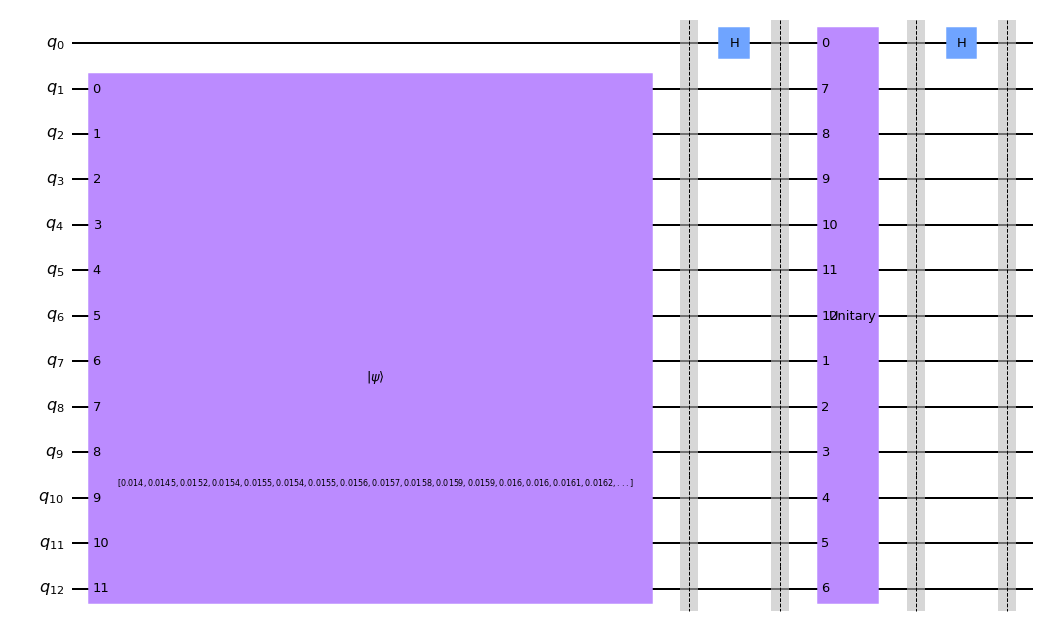

In [38]:
#Fourth Iteration:
iteration3_state = amplitude_encode(npiteration3)

qc = QuantumCircuit(13)

qc.initialize(iteration3_state, [1,2,3,4,5,6,7,8,9,10,11,12])
qc.barrier()

qc.h(0)
qc.barrier()

qc.unitary(decUnitary, [0,7,8,9,10,11,12,1,2,3,4,5,6])
qc.barrier()

qc.h(0)

qc.save_statevector()

qc.draw()

In [39]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)

# Run and get statevector
result = simulator.run(qc).result()
statevector4 = result.get_statevector(qc)

print(statevector4)

Statevector([ 1.41265194e-02-8.75541053e-19j,
             -1.72151132e-04+8.75541053e-19j,
              1.45974034e-02-9.00343916e-19j, ...,
              7.59490289e-05+8.83601984e-19j,
              1.39391784e-02-8.54458620e-19j,
             -1.51898058e-05+8.54458620e-19j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


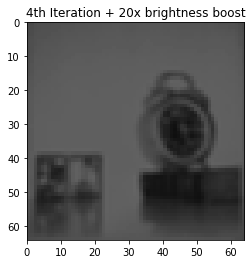

In [43]:
iteration4 = []
for i in range(2**13):
    if(i % 2 == 0):
        iteration4.append(np.real(statevector4[i]))
        
#print(iteration1)

npiteration4 = np.array(iteration4)
npiteration4 = normalize(npiteration4)
npiteration4 = npiteration4.reshape((64,64))

plot_image64_001(npiteration4, "4th Iteration + 20x brightness boost")

In [45]:
print(np_test_image_final_reshaped)

[[0.70703125 0.60546875 0.7265625  ... 0.75390625 0.75390625 0.66015625]
 [0.75390625 0.62890625 0.7265625  ... 0.76171875 0.78515625 0.640625  ]
 [0.7421875  0.64453125 0.74609375 ... 0.78515625 0.796875   0.6796875 ]
 ...
 [0.74609375 0.58984375 0.76953125 ... 0.625      0.61328125 0.6328125 ]
 [0.734375   0.5703125  0.75       ... 0.625      0.65625    0.64453125]
 [0.7421875  0.6015625  0.71875    ... 0.69921875 0.70703125 0.70703125]]


In [46]:
print(npiteration4)

[[0.01413988 0.0146112  0.01523964 ... 0.01547277 0.01472777 0.01444396]
 [0.01429699 0.01478352 0.01539675 ... 0.01581233 0.01504199 0.01456052]
 [0.01427164 0.01485447 0.01557414 ... 0.01606574 0.01533087 0.01479872]
 ...
 [0.01376484 0.01346582 0.0122799  ... 0.01358239 0.01403345 0.01408919]
 [0.01393209 0.01390168 0.01334926 ... 0.01433753 0.01445409 0.01404865]
 [0.01432233 0.01475818 0.01477338 ... 0.01464161 0.01451998 0.01395236]]


In [50]:
top_left_pixel_0 = (np_test_image_final_reshaped[0][0] + (2 * np_test_image_final_reshaped[0][1]) + np_test_image_final_reshaped[0][2])
top_left_pixel_1 = 2 * (np_test_image_final_reshaped[1][0] + (2 * np_test_image_final_reshaped[1][1]) + np_test_image_final_reshaped[1][2])
top_left_pixel_2 = (np_test_image_final_reshaped[2][0] + (2 * np_test_image_final_reshaped[2][1]) + np_test_image_final_reshaped[2][2])

top_left_pixel = (top_left_pixel_0 + top_left_pixel_1 + top_left_pixel_2) / 16

print(top_left_pixel)
print(npiteration4[0][0])

0.68115234375
0.014139875336751739


In [52]:
denormalization_factor = top_left_pixel / npiteration4[0][0]

print(denormalization_factor)

48.172443358081026


In [53]:
npiteration4_denormalized = npiteration4 * denormalization_factor
print(npiteration4_denormalized)

[[0.68115234 0.70385742 0.73413086 ... 0.74536133 0.70947266 0.69580078]
 [0.6887207  0.7121582  0.74169922 ... 0.76171875 0.72460937 0.70141602]
 [0.6875     0.71557617 0.75024414 ... 0.77392578 0.73852539 0.71289062]
 ...
 [0.66308594 0.64868164 0.59155273 ... 0.65429687 0.67602539 0.67871094]
 [0.67114258 0.66967773 0.64306641 ... 0.69067383 0.69628906 0.67675781]
 [0.68994141 0.7109375  0.71166992 ... 0.70532227 0.69946289 0.67211914]]


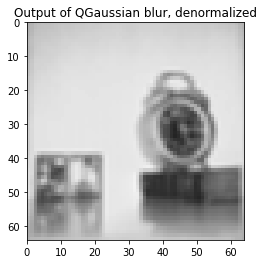

In [55]:

plot_image64(npiteration4_denormalized, "Output of QGaussian blur, denormalized")

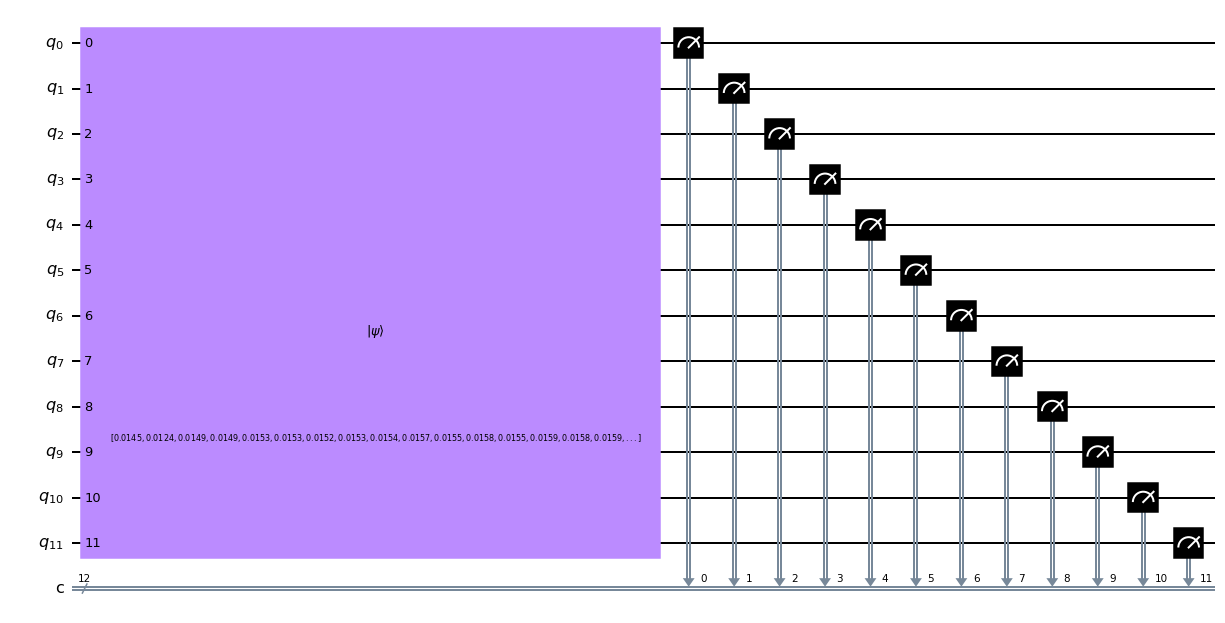

In [10]:
qc_image = QuantumCircuit(12,12)

qc_image.initialize(image_state, [0,1,2,3,4,5,6,7,8,9,10,11])

qc_image.measure([0,1,2,3,4,5,6,7,8,9,10,11], [0,1,2,3,4,5,6,7,8,9,10,11])

qc_image.draw()

In [11]:
#Running on a simulator:
simulator = Aer.get_backend('aer_simulator')
qc_image_transpiled = transpile(qc_image, simulator)

# Run and get statevector
result = simulator.run(qc_image_transpiled, shots=81920).result()
counts_1 = result.get_counts()

print(counts_1)

{'101111101011': 1, '101001110100': 1, '011110101100': 1, '111000000110': 1, '011101110010': 1, '110110101100': 1, '101100111010': 2, '110000100101': 1, '110010110000': 1, '110000101100': 1, '110011100111': 2, '101110100101': 1, '110000100111': 4, '100011110111': 1, '101010001000': 1, '101111100110': 2, '111000101010': 3, '100100101110': 1, '100001101100': 1, '011110110000': 1, '011011101110': 1, '110100110111': 4, '101110101011': 2, '110010101110': 2, '110111101100': 3, '111011111111': 1, '101101110111': 4, '110001101011': 1, '110101110100': 1, '110101111000': 1, '110100110011': 1, '011110101101': 1, '110011000101': 2, '011010101110': 2, '011111101001': 1, '101111111101': 3, '110010111101': 2, '110001100111': 1, '101111111110': 4, '110101000100': 1, '101101110010': 1, '110011101010': 1, '110000101000': 2, '110110001000': 2, '010111101111': 4, '101011101111': 2, '101100111100': 3, '101110100100': 1, '110111101111': 5, '100011110011': 6, '011111110100': 1, '110101100111': 1, '1100111010

In [12]:
get_bin = lambda x, n: format(x, 'b').zfill(n)

image_counts_1 = [counts_1[get_bin(i,12)] for i in range(2**12)] 

np_image_counts_1 = np.array(image_counts_1)
np_image_counts_1 = np_image_counts_1 / 40960
np_image_counts_1 = np.sqrt(np_image_counts_1)
np_image_counts_1 = normalize(np_image_counts_1)

np_image_counts_1_reshaped = np_image_counts_1.reshape((64,64))

print(np_image_counts_1_reshaped)

plot_image4x4_brightened(np_image_counts_1_reshaped, "Probabilistic Image; 40960 Shots")

Traceback (most recent call last):
  Input In [12] in <cell line: 3>
    image_counts_1 = [counts_1[get_bin(i,12)] for i in range(2**12)]
  Input In [12] in <listcomp>
    image_counts_1 = [counts_1[get_bin(i,12)] for i in range(2**12)]
KeyError: '010000101010'

Use %tb to get the full traceback.
